In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Image Classification Using CNN**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from tensorflow import keras
from keras import preprocessing

2024-04-14 04:21:32.954161: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 04:21:32.954320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 04:21:33.129853: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dataset = '/kaggle/input/image-classification/seg_train/seg_train'
test_dataset = '/kaggle/input/image-classification/seg_test/seg_test'

In [5]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

**ImageDataGenerator** class ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original corpus of images.

In [6]:
rescaled = ImageDataGenerator(1/255)

**image_dataset_from_directory** function. Generates a tf.data.Dataset from image files in a directory.

In [7]:
train_set = tf.keras.utils.image_dataset_from_directory(train_dataset, image_size=(128, 128), 
                                                        batch_size=32, label_mode='categorical',
                                                       subset='training', validation_split=0.2, seed=42)
test_set = tf.keras.utils.image_dataset_from_directory(test_dataset, image_size=(128, 128),
                                                      batch_size=32, label_mode='categorical',
                                                      subset='validation', validation_split=0.2, seed=42)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 3000 files belonging to 6 classes.
Using 600 files for validation.


**Sequential** The function will execute and create each model layer one by one. 
The input_shape is the argument of the sequential function that helps us define the layers that will be visible in the network

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2), #1st layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2), #2nd layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #3rd layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #4th layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


View the Model Summary

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 122, 122, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 61, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 59, 59, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 57, 57, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 55, 55, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,038 (2.12 MB)

 Trainable params: 556,038 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

**Complie** the Model using Adam Optimizers ***categorical_crossentropy***

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [13]:
model_checkpoint = ModelCheckpoint(filepath='/kaggle/working/my_model.keras', monitor='val_loss', 
                                   save_best_only=True)


In [14]:
lr_late = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1)

In [15]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [16]:
test_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [17]:
hist = model.fit(train_set, shuffle=True, epochs=25, validation_data=test_set,
                callbacks=[early_stop, model_checkpoint, lr_late], verbose=1)

Epoch 1/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 313s 876ms/step - accuracy: 0.2596 - loss: 1.6591 - val_accuracy: 0.4617 - val_loss: 1.2885 - learning_rate: 0.0010
Epoch 2/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 312s 888ms/step - accuracy: 0.4781 - loss: 1.1496 - val_accuracy: 0.5317 - val_loss: 1.1250 - learning_rate: 0.0010
Epoch 3/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 315s 897ms/step - accuracy: 0.5756 - loss: 1.0271 - val_accuracy: 0.5700 - val_loss: 1.0091 - learning_rate: 0.0010
Epoch 4/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 321s 895ms/step - accuracy: 0.6155 - loss: 0.9435 - val_accuracy: 0.6100 - val_loss: 0.9727 - learning_rate: 0.0010
Epoch 5/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 312s 889ms/step - accuracy: 0.6539 - loss: 0.8586 - val_accuracy: 0.6567 - val_loss: 0.8767 - learning_rate: 0.0010
Epoch 6/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 310s 883ms/step - accuracy: 0.6924 - loss: 0.8072 - val_accuracy: 0.7367 - val_loss: 0.7138 - learning_rate: 0.0010
Epoch 7/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 322s 883ms/step - accura

Plotting The Results

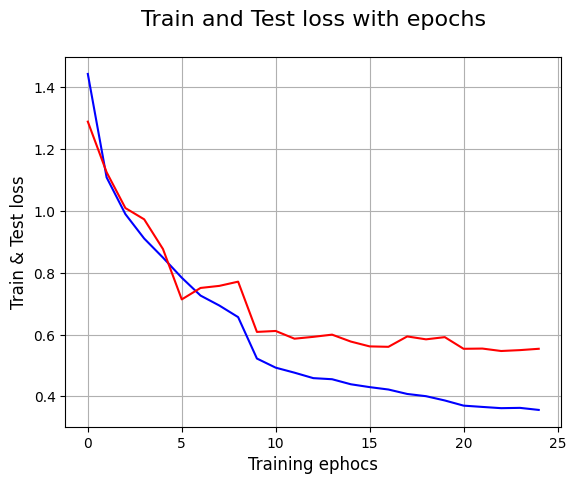

In [18]:
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='red', label='train')
plt.grid(True)
plt.title('Train and Test loss with epochs\n', fontsize=16)
plt.xlabel('Training ephocs', fontsize=12)
plt.ylabel('Train & Test loss', fontsize=12)
plt.show();

Plotting results with accuracy

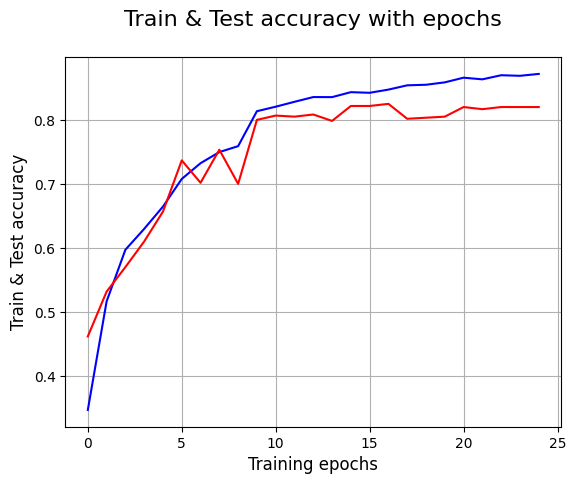

In [19]:
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='red', label='train')
plt.grid(True)
plt.title("Train & Test accuracy with epochs\n", fontsize=16)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Train & Test accuracy", fontsize=12)
plt.show();

In [20]:
acc = model.evaluate(test_set, steps=len(test_set), verbose=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.8141 - loss: 0.5419
